import packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import data

In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset ml/stock_tunisia/index_stock_tunisia.csv')
df

,DATE,TUNINDEX,INDSF,INDBQ,INDAS,INSFI,INDSC,INDDI,INBCO,INAUE,INAAB,INDIN,INBMC,INDMB,TUNINDEX20,INPMP
0,02/01/2013,4621.99,3066.3,2749.78,8952.83,4704.01,3928.61,5697.27,2663.43,2361.04,2720.7,1862.78,1308.69,2599.97,1807.53,NaN
1,03/01/2013,4642.08,3070.24,2753.0,8990.21,4703.39,3947.45,5703.18,2688.91,2454.99,2737.8,1892.5,1331.0,2596.29,1817.9,NaN
2,04/01/2013,4654.33,3068.77,2753.48,8994.91,4668.97,3964.21,5723.46,2724.14,2520.72,2767.65,1903.14,1334.89,2606.68,1824.82,NaN
3,07/01/2013,4652.74,3070.87,2753.14,9015.93,4700.36,3968.93,5724.95,2753.83,2502.98,2804.92,1870.27,1310.05,2603.49,1827.85,NaN
4,08/01/2013,4634.63,3063.27,2746.39,8987.18,4690.59,3970.27,5729.97,2721.8,2509.74,2764.15,1861.52,1302.84,2562.4,1817.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,25/12/2018,7171.03,4900.45,4591.33,10365.92,5659.94,3079.94,4782.21,7373.02,1742.67,9383.31,1391.12,682.87,3546.17,3207.26,1991.77
1492,26/12/2018,7171.42,4911.0,4601.09,10457.11,5652.64,3072.55,4773.5,7343.66,1742.04,9349.3,1392.99,683.18,3510.96,3206.1,1976.68
1493,27/12/2018,7202.72,4932.18,4625.67,10314.5,5657.36,3064.85,4760.85,7377.93,1746.13,9406.43,1398.69,683.2,3565.5,3222.19,1962.89
1494,28/12/2018,7259.67,4965.97,4655.02,10462.86,5710.45,3073.92,4775.75,7455.1,1798.76,9477.02,1409.63,683.77,3609.65,3249.43,2025.78


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        1496 non-null   object
 1   TUNINDEX    1496 non-null   object
 2   INDSF       1496 non-null   object
 3   INDBQ       1496 non-null   object
 4   INDAS       1496 non-null   object
 5   INSFI       1496 non-null   object
 6   INDSC       1496 non-null   object
 7   INDDI       1496 non-null   object
 8   INBCO       1496 non-null   object
 9   INAUE       1496 non-null   object
 10  INAAB       1496 non-null   object
 11  INDIN       1496 non-null   object
 12  INBMC       1496 non-null   object
 13  INDMB       1496 non-null   object
 14  TUNINDEX20  1496 non-null   object
 15  INPMP       1001 non-null   object
dtypes: object(16)
memory usage: 187.1+ KB


cleaning data

In [4]:
df.drop('INPMP',axis=1)

,DATE,TUNINDEX,INDSF,INDBQ,INDAS,INSFI,INDSC,INDDI,INBCO,INAUE,INAAB,INDIN,INBMC,INDMB,TUNINDEX20
0,02/01/2013,4621.99,3066.3,2749.78,8952.83,4704.01,3928.61,5697.27,2663.43,2361.04,2720.7,1862.78,1308.69,2599.97,1807.53
1,03/01/2013,4642.08,3070.24,2753.0,8990.21,4703.39,3947.45,5703.18,2688.91,2454.99,2737.8,1892.5,1331.0,2596.29,1817.9
2,04/01/2013,4654.33,3068.77,2753.48,8994.91,4668.97,3964.21,5723.46,2724.14,2520.72,2767.65,1903.14,1334.89,2606.68,1824.82
3,07/01/2013,4652.74,3070.87,2753.14,9015.93,4700.36,3968.93,5724.95,2753.83,2502.98,2804.92,1870.27,1310.05,2603.49,1827.85
4,08/01/2013,4634.63,3063.27,2746.39,8987.18,4690.59,3970.27,5729.97,2721.8,2509.74,2764.15,1861.52,1302.84,2562.4,1817.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,25/12/2018,7171.03,4900.45,4591.33,10365.92,5659.94,3079.94,4782.21,7373.02,1742.67,9383.31,1391.12,682.87,3546.17,3207.26
1492,26/12/2018,7171.42,4911.0,4601.09,10457.11,5652.64,3072.55,4773.5,7343.66,1742.04,9349.3,1392.99,683.18,3510.96,3206.1
1493,27/12/2018,7202.72,4932.18,4625.67,10314.5,5657.36,3064.85,4760.85,7377.93,1746.13,9406.43,1398.69,683.2,3565.5,3222.19
1494,28/12/2018,7259.67,4965.97,4655.02,10462.86,5710.45,3073.92,4775.75,7455.1,1798.76,9477.02,1409.63,683.77,3609.65,3249.43


In [5]:
for i in df.columns[1:]:
  df[i]=df[i].apply(lambda X : float(str(X).replace(',','.')) )

plotting data

<Figure size 1440x1080 with 0 Axes>

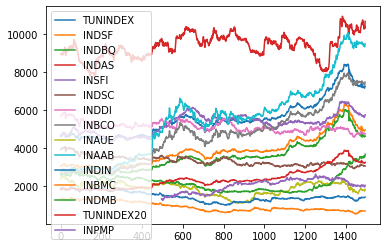

In [6]:
fig = plt.figure(figsize=(20,15))
df.drop('DATE',axis=1).plot()
plt.show()

prepare time series for the TUNINDEX market index 

In [7]:
data=df[['DATE','TUNINDEX']]
data.head()

,DATE,TUNINDEX
0,02/01/2013,4621.99
1,03/01/2013,4642.08
2,04/01/2013,4654.33
3,07/01/2013,4652.74
4,08/01/2013,4634.63


In [8]:
data['DATE']=pd.to_datetime(data['DATE'])
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,TUNINDEX
0,2013-02-01,4621.99
1,2013-03-01,4642.08
2,2013-04-01,4654.33
3,2013-07-01,4652.74
4,2013-08-01,4634.63


In [9]:
data.set_index('DATE',inplace=True)

In [10]:
data

,TUNINDEX
DATE,
2013-02-01,4621.99
2013-03-01,4642.08
2013-04-01,4654.33
2013-07-01,4652.74
2013-08-01,4634.63
...,...
2018-12-25,7171.03
2018-12-26,7171.42
2018-12-27,7202.72


plotting the time series

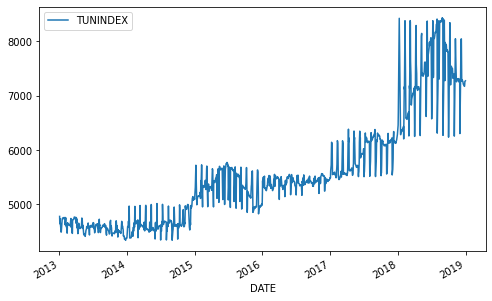

In [11]:
data.plot(figsize=(8,5))

scaling the data

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_sc=scaler.fit_transform(np.array(data).reshape(-1,1))
data_sc

array([[0.06944848],
       [0.0743557 ],
       [0.0773479 ],
       ...,
       [0.69982193],
       [0.71373264],
       [0.71665889]])

spliting the data

In [13]:
training_size=int(len(data_sc)*0.7)
val_size=int(len(data_sc)*0.15)
test_size=len(data_sc)-training_size-val_size
train_data,val_data,test_data=data_sc[0:training_size],data_sc[training_size:training_size+val_size],data_sc[training_size+val_size:len(data_sc)]

In [14]:
print(train_data)

[[0.06944848]
 [0.0743557 ]
 [0.0773479 ]
 ...
 [0.30091574]
 [0.29932559]
 [0.30230803]]


In [23]:
training_size,val_size,test_size

(1047, 224, 225)

prepare datasets for lstm model

In [56]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [24]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape) 

(946, 100)
(946,)


(None, None)

In [26]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

build the model

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


fitting the data

In [32]:
model_history=model.fit(X_train,y_train,validation_data=(X_val,yval),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 165ms/step - loss: 0.0117 - val_loss: 0.0370
Epoch 2/100
15/15 [==============================] - 1s 72ms/step - loss: 0.0021 - val_loss: 0.0041
Epoch 3/100
15/15 [==============================] - 1s 73ms/step - loss: 7.0062e-04 - val_loss: 3.5945e-04
Epoch 4/100
15/15 [==============================] - 1s 74ms/step - loss: 4.7311e-04 - val_loss: 4.6462e-04
Epoch 5/100
15/15 [==============================] - 1s 74ms/step - loss: 4.1325e-04 - val_loss: 3.5300e-04
Epoch 6/100
15/15 [==============================] - 1s 73ms/step - loss: 3.9298e-04 - val_loss: 3.2778e-04
Epoch 7/100
15/15 [==============================] - 1s 72ms/step - loss: 3.7598e-04 - val_loss: 3.1547e-04
Epoch 8/100
15/15 [==============================] - 1s 73ms/step - loss: 3.7430e-04 - val_loss: 3.4246e-04
Epoch 9/100
15/15 [==============================] - 1s 72ms/step - loss: 3.4771e-04 - val_loss: 3.3726e-04
Epoch 10/100
15/15 [=======================

plotting the results

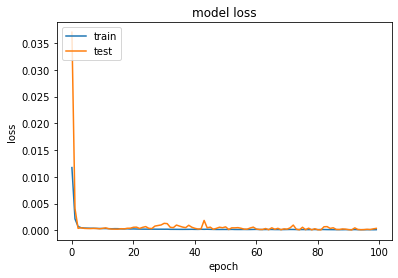

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

test the model

In [35]:
train_predict=model.predict(X_train)
val_predict=model.predict(X_val)
test_predict=model.predict(X_test)

In [36]:
train_predict=scaler.inverse_transform(train_predict)
val_predict=scaler.inverse_transform(val_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_train,train_predict))

5076.029474340413

In [41]:
math.sqrt(mean_squared_error(ytest,test_predict))

7555.715889728778

plot the testing results(the blue is the entire data ,the orange is the predicted training data, the green is the preducted validation data and the red is the predicted test data) 

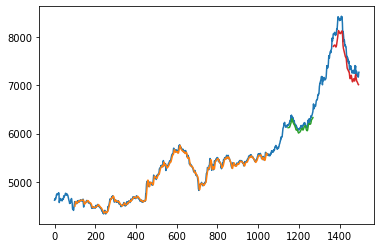

In [54]:
look_back=100
trainPredictPlot = np.empty_like(data_sc)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
valPredictPlot = np.empty_like(data_sc)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(train_predict)+(look_back*2)+1:len(train_predict)+len(val_predict)+(look_back*2)+1, :] = val_predict
testPredictPlot = np.empty_like(data_sc)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+len(val_predict)+(look_back*3)+1:len(data_sc)-2, :] = test_predict
plt.plot(scaler.inverse_transform(data_sc))
plt.plot(trainPredictPlot)
plt.plot(valPredictPlot)
plt.plot(testPredictPlot)
plt.show()

save the model

In [55]:
model.save("model.h5")